# GDP ANALYSIS: VARIABLE COTRIBUTION AND ACCURANCY CHECKING
Using data(1980-2021)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats 
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

# Import data Frame

In [5]:
df=pd.read_csv("GDP_data.csv")
df.rename(columns={'Time':'Year'},inplace=True)
df.head()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,NaN,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,NaN,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,NaN,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,NaN,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


In [6]:

df.shape
# df["FDIO"].fillna(0,inplace=True)
# G_F_C_E fill null by the mean

x=df["G_F_C_E"].mean()
df["G_F_C_E"].fillna(x,inplace=True)
## G_Savings null values replace by their mean
x=df["G_Savings"].mean()
df["G_Savings"].fillna(x,inplace=True)
x=df["Remittances"].min()
df["Remittances"].fillna(x,inplace=True)

#Reserve	replace null value by mean value
x=df["Reserve"].mean()
df["Reserve"].fillna(x,inplace=True)
#Stocks null value replace by mean value
x=df["U Rate"].median()
df["U Rate"].fillna(x,inplace=True)
#Foregin direct investment inflow
# df["FDII"].fillna(0,inplace=True)

df.head(5)

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,3.38,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,3.38,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,3.38,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,3.38,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


# Correlation Matrix

In [7]:
df = round(df,2)
df
df.columns

Index(['Year', 'Exports', 'FCE', 'GDP', 'G_F_C_E', 'D_Savings', 'G_Savings',
       'Imports', 'Inflation', 'Remittances', 'U Rate', 'Reserve', 'Industry'],
      dtype='object')

In [8]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


# Min-Max scaling

In [9]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


In [10]:
x2=df.Year
df=pd.concat([x2,df_norm],axis=1)
df.head()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


In [11]:
x2.shape

(43,)

In [12]:
df_norm.shape

(43, 12)

In [13]:
df.to_csv("cleanned_data12.csv")

# Import clean data frame

In [14]:
df=pd.read_csv("cleanned_data12.csv")
df.head(10)



,Unnamed: 0,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793
5,5,1985,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.269608,0.022463,0.050279
6,6,1986,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009804,0.023004,0.054469
7,7,1987,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.602941,0.070501,0.000000
8,8,1988,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.602941,0.090528,0.023743
9,9,1989,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.013268


In [15]:
list(df.columns)
df=df.drop(['Unnamed: 0','Year'],axis=1)
df

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793
5,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.269608,0.022463,0.050279
6,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009804,0.023004,0.054469
7,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.602941,0.070501,0.000000
8,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.602941,0.090528,0.023743
9,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.013268


In [16]:
cor=df.corr()
cor

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
Exports,1.000000,-0.656600,0.622348,0.551832,0.656600,0.866409,0.925976,-0.157967,0.901113,0.516602,0.631762,0.506289
FCE,-0.656600,1.000000,-0.685654,-0.613177,-1.000000,-0.883394,-0.475156,0.162893,-0.543367,-0.405353,-0.714242,-0.798536
GDP,0.622348,-0.685654,1.000000,0.454190,0.685654,0.683719,0.530272,-0.156871,0.497556,0.366894,0.548621,0.613760
G_F_C_E,0.551832,-0.613177,0.454190,1.000000,0.613177,0.556594,0.508379,-0.032324,0.415821,0.500743,0.700437,0.813245
D_Savings,0.656600,-1.000000,0.685654,0.613177,1.000000,0.883394,0.475156,-0.162893,0.543367,0.405353,0.714242,0.798536
G_Savings,0.866409,-0.883394,0.683719,0.556594,0.883394,1.000000,0.760877,-0.158734,0.867513,0.477104,0.759363,0.703212
Imports,0.925976,-0.475156,0.530272,0.508379,0.475156,0.760877,1.000000,-0.042988,0.897937,0.442654,0.576913,0.432776
Inflation,-0.157967,0.162893,-0.156871,-0.032324,-0.162893,-0.158734,-0.042988,1.000000,-0.117729,-0.078587,0.074271,-0.099275
Remittances,0.901113,-0.543367,0.497556,0.415821,0.543367,0.867513,0.897937,-0.117729,1.000000,0.452117,0.603193,0.421684
U Rate,0.516602,-0.405353,0.366894,0.500743,0.405353,0.477104,0.442654,-0.078587,0.452117,1.000000,0.441474,0.373427


# Heatmap

<Axes: >

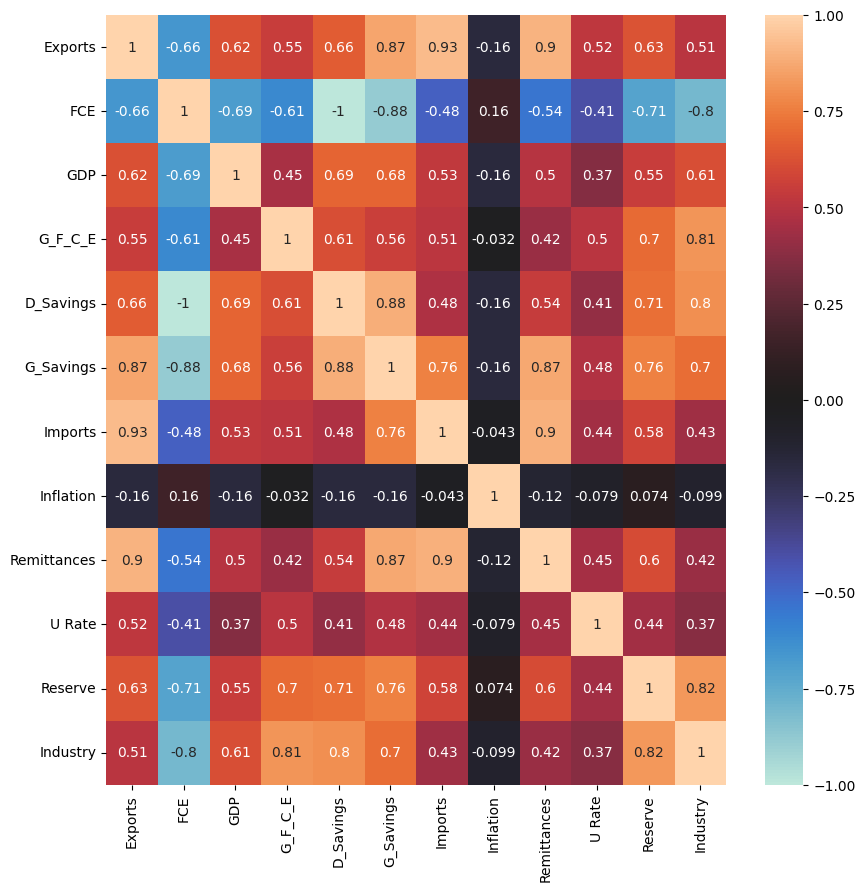

In [17]:
#Heatmap
plt.figure(figsize=(10,10))            
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap


# Upper trangular matrix

In [18]:
mask = np.triu(np.ones_like(df.corr()))
 

<function matplotlib.pyplot.show(close=None, block=None)>

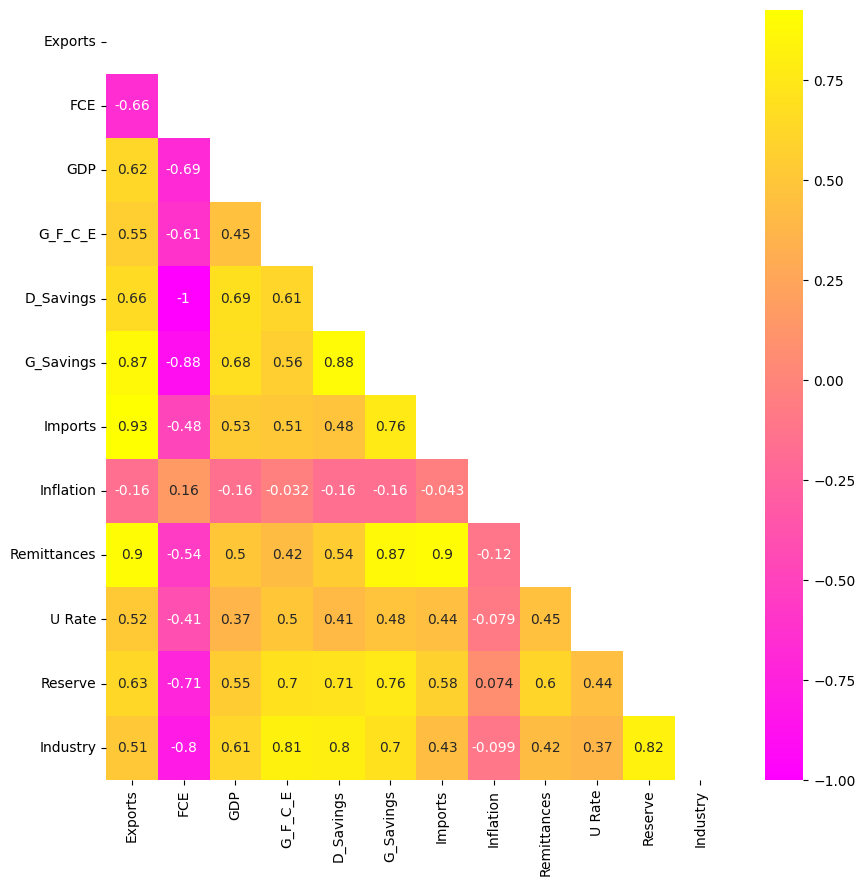

In [19]:
#upper trangular correlation matrix
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="spring",annot=True)
plt.show
# plt.savefig("upper_trangular_matrix.png")

# Multiple Linear Regrssion

In [20]:
df=pd.concat([x2,df],axis=1)

x=df.drop("GDP",axis=1)
x1=df.Year

y=df.GDP
x.shape,x1.shape,y.shape

((43, 12), (43,), (43,))

In [31]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,median_absolute_error,mean_absolute_percentage_error

In [22]:
X = df.drop("GDP",axis=1)
y = df.GDP

In [23]:
X.shape,y.shape

((43, 12), (43,))

In [24]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2,random_state=17)

In [25]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

18.22061243198697
[-0.00931544  0.62043735  0.3129435  -0.13791473 -0.3129435   1.63623744
  0.12396406 -0.0319419  -0.99683581  0.05142901 -0.12497671  0.52308454]


In [26]:
lm_train_score=lm.score(xtrain,ytrain)
lm_test_score=lm.score(xtest,ytest)
print("train score:{}".format(lm_train_score))
print("test score:{}".format(lm_test_score))



train score:0.5481471709814207
test score:0.8092365471179529


In [27]:
y_prediction=lm.predict(xtest)
r2_score(ytest,y_prediction)

0.8092365471179529

In [82]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,lm.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,lm.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,lm.predict(xtrain))))


Root Mean squared error for train data:0.1499883760119021
Mean absulate error for train data:0.11542767806344521
Median absulate error for train data:0.09429362889701404


# Hyperparameter Tuning Ridge regression model

In [34]:
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.model_selection import GridSearchCV


In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


RidgeRegression = Ridge()
Parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression,Parameters, cv=5)
ridgeRegressor.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [36]:
print(ridgeRegressor.best_estimator_)

Ridge(alpha=100)


In [37]:
model_2=Ridge(alpha=100)
model_2.fit(xtrain,ytrain)

Ridge(alpha=100)

In [38]:
train_score=model_2.score(xtrain,ytrain)
test_score=model_2.score(xtest,ytest)
print(train_score,test_score)

0.38639266281570417 0.7886605668488215


In [39]:
y_pred_2=model_2.predict(xtest)

In [40]:
r2_score(ytest,y_pred_2)

0.7886605668488215

In [41]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,model_2.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,model_2.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,model_2.predict(xtrain))))



Mean squared error for train data:0.17478508578455088
Mean absulate error for train data:0.12609884576536176
Median absulate error for train data:0.08694871970036402


# HyperParameter Tuning for lasso regression

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


In [43]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.06,0.07,0.08,1,2,3],
               'selection':['cyclic', 'random']
               }
lasso_model=GridSearchCV(Lasso(),lasso_params)
lasso_model.fit(xtrain,ytrain)
print(lasso_model.best_estimator_)

Lasso(alpha=1)


In [44]:
lasso_model_2=Lasso(alpha=1)
lasso_model_2.fit(xtrain,ytrain)

Lasso(alpha=1)

In [45]:
train_score=lasso_model_2.score(xtrain,ytrain)

test_score=lasso_model_2.score(xtest,ytest)
print(train_score)
print(test_score)


0.2461138531138075
0.2679558366132734


In [46]:
y_pred=lasso_model_2.predict(xtest)
r2_score(ytest,y_pred)

0.2679558366132734

# Hyperparameter Tuning for SV Regression

In [47]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
sv_model=grid.fit(xtrain, ytrain) 
print(sv_model.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.131 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.066 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.099 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.292 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.366 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.086 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.158 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.041 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-1.108 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.467 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [48]:
sv_model_2=SVR(C=10,gamma=0.001,kernel='rbf',)
sv_model_2.fit(xtrain,ytrain)

SVR(C=10, gamma=0.001)

In [49]:
sv_train_score=sv_model_2.score(xtrain,ytrain)
sv_test_score=sv_model_2.score(xtest,ytest)
print("train score:{}".format(sv_train_score))
print("test score:{}".format(sv_test_score))


train score:0.3953921487361983
test score:0.6672524746499546


In [50]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,sv_model_2.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,sv_model_2.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,sv_model_2.predict(xtrain))))



Mean squared error for train data:0.17349860660546876
Mean absulate error for train data:0.12618300057509196
Median absulate error for train data:0.09953285433047776


# Hyperparameter Tuning for Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [52]:
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [62]:
# from sklearn.metrics import 
random_search =GridSearchCV(RandomForestRegressor(),param_grid) 
random_search.fit(xtrain, ytrain) 
print(random_search.best_estimator_) 


RandomForestRegressor(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                      n_estimators=50)


In [63]:
model_rand=RandomForestRegressor(max_depth=3,
                                 max_features='sqrt',
                                 max_leaf_nodes=3,
                                 n_estimators=50
                            
                                 )
model_rand.fit(xtrain, ytrain) 
y_pred_rand = model_rand.predict(xtest)
r2_score(ytest,y_pred_rand)

0.5528985851123469

In [64]:
train_score=model_rand.score(xtrain,ytrain)
test_score=model_rand.score(xtest,ytest)
print("train score:{}".format(train_score))
print("test score:{}".format(test_score))



train score:0.5579338797836216
test score:0.5528985851123469


In [66]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, model_rand.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,model_rand.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,model_rand.predict(xtrain))))



Root Mean squared error for train data:0.14835518040183712
Mean absulate error for train data:0.1114797716100362
Median absulate error for train data:0.08402984532003988


# Hyperparameter tuning of GradientBoostRegressor

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [68]:
para_grid={
    'n_estimators': [ 100, 200, 300, 400,500, 600, 700, 800, 900, 1000,1100, 1200],
    'min_samples_split': [2,4,8],
    'learning_rate': [0.01,0.1,1],
    'max_features': [ 'auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, 25, 30]
}


In [69]:
gb_model = GridSearchCV(GradientBoostingRegressor(),para_grid,cv=5)
gb_model.fit(xtrain,ytrain)
print(gb_model.best_estimator_)

GradientBoostingRegressor(learning_rate=1, max_depth=20, max_features='sqrt',
                          min_samples_split=4, n_estimators=1200)


In [72]:
gb_model_2=GradientBoostingRegressor(
                                    learning_rate=1,
                                     max_depth=10,
                                     max_features='sqrt',
                                     min_samples_split=4,
                                    n_estimators=500
                                     
                                     
                               )
gb_model_2.fit(xtrain,ytrain)
y_gb_pred=gb_model_2.predict(xtest)
r2_score(ytest,y_gb_pred)

0.12492108276626135

In [73]:
train_score=gb_model_2.score(xtrain,ytrain)
test_score=gb_model_2.score(xtest,ytest)
print("train_score:{:.2f}".format(train_score))
print("train_score:{:.2f}".format(test_score))


train_score:1.00
train_score:0.12


In [77]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, gb_model_2.predict(xtrain)))))

print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, gb_model_2.predict(xtest)))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,gb_model_2.predict(xtrain))))


Mean squared error for train data:1.410389964315372e-08
Mean squared error for test data:0.17327419721558404
Median absulate error for train data:1.3799555942384245e-09


# Hyperparameter tuning for adaboost regression.

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_dist = {
 'n_estimators': [50, 100,150,200,500],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }


In [76]:
rand_search = GridSearchCV(AdaBoostRegressor(),param_dist,cv=5)
rand_search.fit(xtrain,ytrain)
print(rand_search.best_estimator_)


AdaBoostRegressor(learning_rate=0.3, loss='exponential')


In [78]:
random_model=AdaBoostRegressor(learning_rate=0.5
                            
                              )
random_model.fit(xtrain,ytrain)
y_rand_pred=random_model.predict(xtest)
r2_score(ytest,y_rand_pred)

0.6006323462816543

In [79]:
train_score=random_model.score(xtrain,ytrain)
test_score=random_model.score(xtest,ytest)
print("train_score:{:.2f}".format(train_score))
print("train_score:{:.2f}".format(test_score))



train_score:0.95
train_score:0.60


In [80]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, random_model.predict(xtrain)))))
print("Mean squared error for test data:{}".format(sqrt(mean_squared_error(ytest, random_model.predict(xtest)))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,random_model.predict(xtrain))))


Mean squared error for train data:0.048640046946865904
Mean squared error for test data:0.11705682180252788
Median absulate error for train data:0.03688621340887632
